# Grover's Algorithm — Qiskit Implementation


This notebook implements **Grover's Algorithm**.

**Goal**: Find a marked element $( x^* $) such that $( f(x^*) = 1 $), using a quantum oracle that flips the phase of the solution.

Grover’s search allows us to find $( x^* \in \{0,1\}^n $) using $( $mathcal{O}($sqrt{2^n}) $) queries instead of $( \mathcal{O}(2^n) $) classically.


##Installing and Importing Dependencies

In [1]:
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZGate
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt


### Define the Oracle

In [4]:
def grover_oracle(n, marked_index):
    oracle = QuantumCircuit(n)
    binary = format(marked_index, f'0{n}b')
    for i, bit in enumerate(binary):
        if bit == '0':
            oracle.x(i)
    oracle.h(n-1)
    oracle.mcx(list(range(n-1)), n-1)
    oracle.h(n-1)
    for i, bit in enumerate(binary):
        if bit == '0':
            oracle.x(i)
    return oracle


### Define the Diffusion Operator

In [5]:
def diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc


### Build and Run Grover's Algorithm

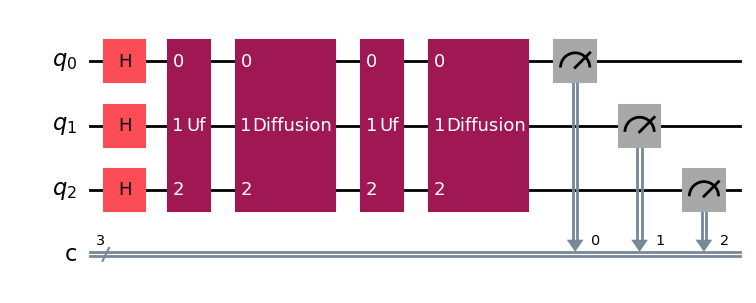

In [6]:
n = 3  # number of qubits
N = 2 ** n
marked_index = 5  # the index to search for, f(x=5)=1

grover_circuit = QuantumCircuit(n, n)
grover_circuit.h(range(n))  # step 1: create superposition

# Calculate optimal number of iterations
r = int(np.floor(np.pi/4 * np.sqrt(N)))

oracle = grover_oracle(n, marked_index)
diff = diffuser(n)

for _ in range(r):
    grover_circuit.append(oracle.to_gate(label="Uf"), range(n))
    grover_circuit.append(diff.to_gate(label="Diffusion"), range(n))

grover_circuit.measure(range(n), range(n))
grover_circuit.draw('mpl')


### Simulate and Visualize Output

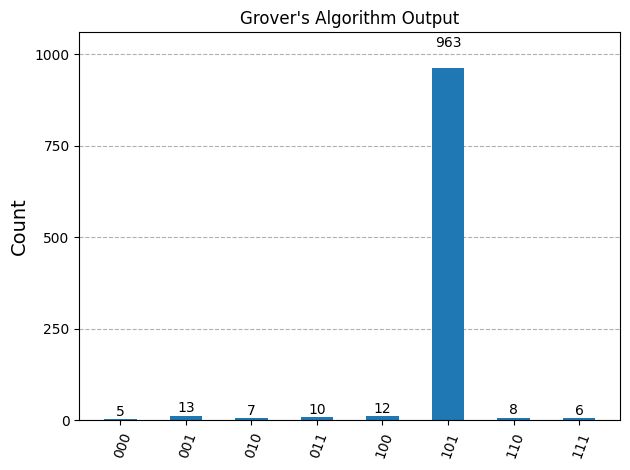

In [10]:
sim = AerSimulator()
compiled = transpile(grover_circuit, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
hist=plot_histogram(counts, title="Grover's Algorithm Output")
display(hist)


### Interpretation

The histogram shows the most probable output after applying Grover’s operator multiple times. Ideally, the state corresponding to the marked index (in this case `101`) has the highest probability.

This verifies that Grover's algorithm has successfully amplified the marked state's amplitude using a small number of iterations.
